# problem: To compare major indian cities 
### For people thinking of opening their business in major cities(most populated cities) or people planning to transfer from one location to another


In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt # for bar graph and pie charts i.e visual analysis
from sklearn.cluster import KMeans
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [3]:
#foursqare credentials
CLIENT_ID = 'FCBYPCDQD3QRIVYNVSWTMSNLJMARGVMBUH1QESH0MSIPYASC' # Foursquare ID
CLIENT_SECRET = 'PHXQL0ENI5ZM3B1QAJSA2G54DLCMPBBCYXOUFA240CUPTOBG' #  Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: FCBYPCDQD3QRIVYNVSWTMSNLJMARGVMBUH1QESH0MSIPYASC
CLIENT_SECRET:PHXQL0ENI5ZM3B1QAJSA2G54DLCMPBBCYXOUFA240CUPTOBG


In [62]:
df1.head()

,lat,lng,country,iso2,admin,capital,population,population_proper
city,,,,,,,,
Mumbai,18.987807,72.836447,India,IN,Mahārāshtra,admin,18978000.0,12691836.0
Delhi,28.651952,77.231495,India,IN,Delhi,admin,15926000.0,7633213.0
Kolkata,22.562627,88.363044,India,IN,West Bengal,admin,14787000.0,4631392.0
Chennai,13.084622,80.248357,India,IN,Tamil Nādu,admin,7163000.0,4328063.0
Bengalūru,12.977063,77.587106,India,IN,Karnātaka,admin,6787000.0,5104047.0


Text(1.12, 0.5, 'Population')

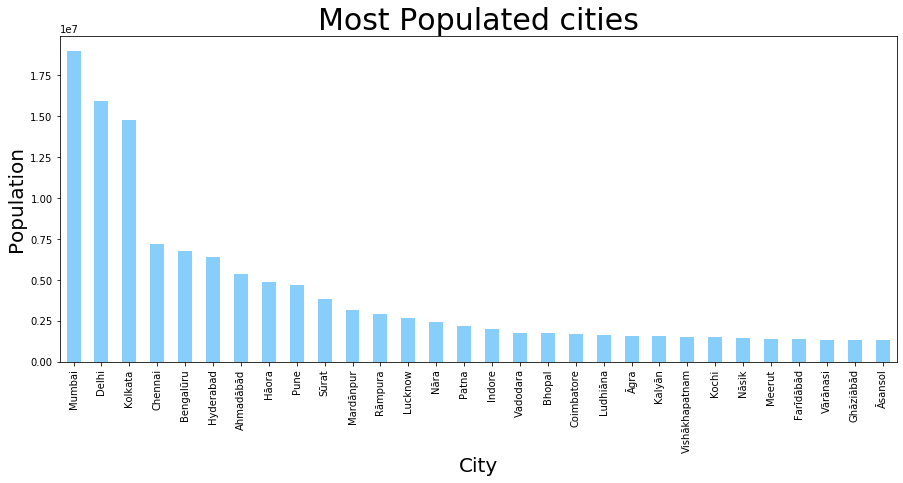

In [84]:
df1=pd.read_csv('in.csv')
df1.set_index('city',inplace=True)
df1['population'].head(30).plot(kind='bar',color='lightskyblue',figsize=(15,6))
plt.title('Most Populated cities',size=30)
plt.xlabel('City',size=20)
plt.ylabel('Population',x=1.12,size=20)

In [4]:
df=pd.read_csv('in.csv')
df=df.head(30)
df=df[['city','lat','lng']]
df

,city,lat,lng
0,Mumbai,18.987807,72.836447
1,Delhi,28.651952,77.231495
2,Kolkata,22.562627,88.363044
3,Chennai,13.084622,80.248357
4,Bengalūru,12.977063,77.587106
5,Hyderabad,17.384052,78.456355
6,Ahmadābād,23.025793,72.587265
7,Hāora,22.576882,88.318566
8,Pune,18.513271,73.849852
9,Sūrat,21.195944,72.830232


In [5]:
lat=20.5937
long= 78.9629

In [6]:
India = folium.Map(location=[lat,long],zoom_start=5)
for lat, lng, label in zip(df['lat'], df['lng'], df['city']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(India)  
    
India

In [7]:
LIMIT=100

In [8]:
def getvenues(names, latitudes, longitudes, radius=2000):
    venues_list=[]
    for lat, lng, label in zip(latitudes,longitudes,names):
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            label, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [32]:
total_venues=getvenues(names=df['city'],
                       latitudes=df['lat'],
                       longitudes=df['lng'])


In [10]:
total_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mumbai,18.987807,72.836447,Spa la Vie by L'OCCITANE,18.987006,72.829707,Spa
1,Mumbai,18.987807,72.836447,Lalbaug,18.991976,72.836221,Plaza
2,Mumbai,18.987807,72.836447,The St. Regis Mumbai,18.993652,72.825220,Hotel
3,Mumbai,18.987807,72.836447,Kebabs & Kurries,18.997938,72.837639,Indian Restaurant
4,Mumbai,18.987807,72.836447,Ladu Samrat,18.994526,72.836574,Maharashtrian Restaurant


In [11]:
total_onehot = pd.get_dummies(total_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
total_onehot['Neighborhood'] = total_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [total_onehot.columns[96]] + list(total_onehot.columns[1:95])+list(total_onehot.columns[97:])
total_onehot = total_onehot[fixed_columns]

total_onehot.head()

,Monument / Landmark,Accessories Store,Afghan Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Beach,Bed & Breakfast,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Café,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Cupcake Shop,Daycare,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karnataka Restaurant,Korean Restaurant,Lake,Light Rail Station,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mosque,Motel,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,Neighborhood,Nightclub,Office,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Pub,Punjabi Restaurant,Racetrack,Recreation Center,Restaurant,Road,Roof Deck,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Sporting Goods Shop,Stadium,Stationery Store,Steakhouse,Sushi Restaurant,Tea Room,Temple,Tennis Court,Thai Restaurant,Theater,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Women's Store,Zoo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Mumbai,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [12]:
total_grouped = total_onehot.groupby('Neighborhood').mean().reset_index()
total_grouped

,Neighborhood,Monument / Landmark,Accessories Store,Afghan Restaurant,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bar,Beach,Bed & Breakfast,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Bus Station,Café,Chaat Place,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Cupcake Shop,Daycare,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Historic Site,History Museum,Hookah Bar,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indian Sweet Shop,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karnataka Restaurant,Korean Restaurant,Lake,Light Rail Station,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mosque,Motel,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,Nightclub,Office,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pier,Pizza Place,Platform,Playground,Plaza,Pub,Punjabi Restaurant,Racetrack,Recreation Center,Restaurant,Road,Roof Deck,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Sporting Goods Shop,Stadium,Stationery Store,Steakhouse,Sushi Restaurant,Tea Room,Temple,Tennis Court,Thai Restaurant,Theater,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Women's Store,Zoo
0,Ahmadābād,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.029412,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.058824,0.000000,0.000000,0.000000,0.029412,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00000,0.000000,0.088235,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.058824,0.000000,0.000000,0.000000,0.088235,0.000000,0.029412,0.235294,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.029412,0.00,0.000000,0.000000,0.000000,0.088235,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.029412,0.000000,0.00,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000,0.029412,0.000000,0.00,0.00,0.000000,0.00,0.00000,0.00,0.058824,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.029412,0.029412,0.00,0.00,0.000000,0.00
1,Bengalūru,0.000000,0.000000,0.01,0.010000,0.010000,0.01,0.01,0.000000,0.010000,0.01,0.000000,0.010000,0.00,0.000000,0.000000,0.010000,0.00000,0.00000,0.000000,0.020000,0.000000,0.020000,0.02,0.01,0.01,0.000000,0.020000,0.000000,0.020000,0.010000,0.01,0.010000,0.00,0.000000,0.01,0.000000,0.00,0.010000,0.01,0.000000,0.01,0.000000,0.010000,0.000000,0.00,0.01000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.02,0.010000,0.000000,0.010000,0.000000,0.000000,0.00,0.010000,0.00,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.060000,0.010000,0.040000,0.160000,0.000000,0.000000,0.040000,0.020000,0.00,0.000000,0.01,0.000000,0.000000,0.000000,0.060000,0.00,0.000000,0.00

In [13]:
total_grouped['Art']=total_grouped['Art Gallery']+total_grouped['Art Museum']+total_grouped['Historic Site']+total_grouped['History Museum']
total_grouped.drop(['Art Gallery','Art Museum','Historic Site','History Museum'],axis=1,inplace=True)

In [14]:
total_grouped['Western food']=total_grouped['American Restaurant']+total_grouped['BBQ Joint']+total_grouped['Burger Joint']+total_grouped['Donut Shop']+total_grouped['French Restaurant']+total_grouped['Fried Chicken Joint']+total_grouped['Mexican Restaurant']+total_grouped['Pizza Place']+total_grouped['Steakhouse']
total_grouped.drop(['American Restaurant','BBQ Joint','Burger Joint','Donut Shop','French Restaurant','Fried Chicken Joint','Mexican Restaurant','Pizza Place','Steakhouse'],axis=1,inplace=True)

In [15]:
total_grouped['Eastern food']=total_grouped['Afghan Restaurant']+total_grouped['Asian Restaurant']+total_grouped['Chaat Place']+total_grouped['Chinese Restaurant']+total_grouped['Diner']+total_grouped['Food']+total_grouped['Food Court']+total_grouped['Hotel']+total_grouped['Indian Restaurant']+total_grouped['Indian Sweet Shop']+total_grouped['Japanese Restaurant']+total_grouped['Punjabi Restaurant']+total_grouped['Sandwich Place']+total_grouped['Sushi Restaurant']+total_grouped['Thai Restaurant']
total_grouped.drop(['Afghan Restaurant','Asian Restaurant','Chaat Place','Chinese Restaurant','Diner','Food','Food Court','Hotel','Indian Restaurant','Indian Sweet Shop','Japanese Restaurant','Punjabi Restaurant','Sandwich Place','Sushi Restaurant','Thai Restaurant'],axis=1,inplace=True)

In [16]:
total_grouped.head()

,Neighborhood,Monument / Landmark,Accessories Store,Arcade,Arts & Crafts Store,Athletics & Sports,Bakery,Bank,Bar,Beach,Bed & Breakfast,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Bus Station,Café,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Cupcake Shop,Daycare,Deli / Bodega,Department Store,Dessert Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food & Drink Shop,Food Truck,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hookah Bar,Hostel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Jewelry Store,Juice Bar,Karnataka Restaurant,Korean Restaurant,Lake,Light Rail Station,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mosque,Motel,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,Nightclub,Office,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pier,Platform,Playground,Plaza,Pub,Racetrack,Recreation Center,Restaurant,Road,Roof Deck,Scenic Lookout,Seafood Restaurant,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Sporting Goods Shop,Stadium,Stationery Store,Tea Room,Temple,Tennis Court,Theater,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Women's Store,Zoo,Art,Western food,Eastern food
0,Ahmadābād,0.0,0.00000,0.00,0.0,0.00,0.000000,0.0,0.00000,0.0,0.00,0.00000,0.00000,0.0,0.00,0.0,0.00,0.00,0.00,0.058824,0.000000,0.029412,0.00,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.088235,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.029412,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.0,0.00,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.029412,0.0,0.000000,0.0,0.0,0.088235,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.029412,0.0,0.00,0.00,0.00,0.0,0.029412,0.0,0.0,0.0,0.000000,0.029412,0.0,0.0,0.029412,0.000000,0.0,0.0,0.00000,0.0,0.058824,0.0,0.0,0.000000,0.0,0.00,0.0,0.029412,0.029412,0.00,0.00,0.000000,0.0,0.058824,0.000000,0.382353
1,Bengalūru,0.0,0.00000,0.01,0.0,0.01,0.010000,0.0,0.00000,0.0,0.01,0.00000,0.00000,0.0,0.02,0.0,0.02,0.02,0.01,0.000000,0.020000,0.010000,0.01,0.010000,0.0,0.0,0.01,0.0,0.0,0.01,0.01,0.000000,0.01,0.000000,0.010000,0.01000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.01,0.040000,0.0,0.040000,0.0,0.000000,0.01,0.0,0.0,0.0,0.06,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.01000,0.0,0.0,0.020000,0.01,0.0,0.0,0.0,0.000000,0.0,0.01,0.02,0.01,0.0,0.000000,0.0,0.0,0.0,0.020000,0.010000,0.0,0.0,0.000000,0.010000,0.0,0.0,0.00000,0.0,0.010000,0.0,0.0,0.010000,0.0,0.01,0.0,0.000000,0.010000,0.01,0.01,0.000000,0.0,0.020000,0.080000,0.300000
2,Bhopal,0.0,0.00000,0.00,0.0,0.00,0.000000,0.0,0.00000,0.0,0.00,0.00000,0.00000,0.0,0.00,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.100000,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0,0.1,0.0,0.00,0.0,0.10000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.100000,0.0,0.00,0.00,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.100000,0.0,0.0,0.000000,0.0,0.00,0.0,0.200000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.300000
3,Chennai,0.0,0.00000,0.00,0.0,0.00,0.000000,0.0,0.00000,0.0,0.00,0.00000,0.

In [17]:
kclusters = 6
#k=6 seems appropriate( for 20 cities) grouping of cities change on the basis of the number of cities you take in the start
total_grouped_clustering = total_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(total_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 1, 1, 5, 5, 5, 5])

In [19]:
# add clustering labels
#total_grouped.drop(['Cluster Labels'],axis=1,inplace=True) #uncomment that command if excecuting again after changing K while taking more number of cities
total_grouped.insert(0, 'Cluster Labels', kmeans.labels_)

total_grouped.head()

,Cluster Labels,Neighborhood,Monument / Landmark,Accessories Store,Arcade,Arts & Crafts Store,Athletics & Sports,Bakery,Bank,Bar,Beach,Bed & Breakfast,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Bus Station,Café,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Cricket Ground,Cupcake Shop,Daycare,Deli / Bodega,Department Store,Dessert Shop,Electronics Store,Farmers Market,Fast Food Restaurant,Flea Market,Flower Shop,Food & Drink Shop,Food Truck,Frozen Yogurt Shop,Furniture / Home Store,Garden,Gas Station,Gastropub,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hardware Store,Hookah Bar,Hostel,Hotel Bar,Ice Cream Shop,Indie Movie Theater,Italian Restaurant,Jewelry Store,Juice Bar,Karnataka Restaurant,Korean Restaurant,Lake,Light Rail Station,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Mosque,Motel,Motorcycle Shop,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Museum,Music Venue,Nightclub,Office,Paper / Office Supplies Store,Park,Parsi Restaurant,Performing Arts Venue,Pharmacy,Pier,Platform,Playground,Plaza,Pub,Racetrack,Recreation Center,Restaurant,Road,Roof Deck,Scenic Lookout,Seafood Restaurant,Shopping Mall,Shopping Plaza,Smoke Shop,Snack Place,South Indian Restaurant,Spa,Sporting Goods Shop,Stadium,Stationery Store,Tea Room,Temple,Tennis Court,Theater,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Women's Store,Zoo,Art,Western food,Eastern food
0,1,Ahmadābād,0.0,0.00000,0.00,0.0,0.00,0.000000,0.0,0.00000,0.0,0.00,0.00000,0.00000,0.0,0.00,0.0,0.00,0.00,0.00,0.058824,0.000000,0.029412,0.00,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.088235,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.029412,0.0,0.000000,0.0,0.000000,0.00,0.0,0.0,0.0,0.00,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.029412,0.0,0.000000,0.0,0.0,0.088235,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.029412,0.0,0.00,0.00,0.00,0.0,0.029412,0.0,0.0,0.0,0.000000,0.029412,0.0,0.0,0.029412,0.000000,0.0,0.0,0.00000,0.0,0.058824,0.0,0.0,0.000000,0.0,0.00,0.0,0.029412,0.029412,0.00,0.00,0.000000,0.0,0.058824,0.000000,0.382353
1,1,Bengalūru,0.0,0.00000,0.01,0.0,0.01,0.010000,0.0,0.00000,0.0,0.01,0.00000,0.00000,0.0,0.02,0.0,0.02,0.02,0.01,0.000000,0.020000,0.010000,0.01,0.010000,0.0,0.0,0.01,0.0,0.0,0.01,0.01,0.000000,0.01,0.000000,0.010000,0.01000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.0,0.01,0.0,0.0,0.01,0.0,0.01,0.040000,0.0,0.040000,0.0,0.000000,0.01,0.0,0.0,0.0,0.06,0.0,0.00000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.01000,0.0,0.0,0.020000,0.01,0.0,0.0,0.0,0.000000,0.0,0.01,0.02,0.01,0.0,0.000000,0.0,0.0,0.0,0.020000,0.010000,0.0,0.0,0.000000,0.010000,0.0,0.0,0.00000,0.0,0.010000,0.0,0.0,0.010000,0.0,0.01,0.0,0.000000,0.010000,0.01,0.01,0.000000,0.0,0.020000,0.080000,0.300000
2,1,Bhopal,0.0,0.00000,0.00,0.0,0.00,0.000000,0.0,0.00000,0.0,0.00,0.00000,0.00000,0.0,0.00,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00000,0.000000,0.100000,0.0,0.0,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.000000,0.0,0.000000,0.0,0.000000,0.00,0.0,0.1,0.0,0.00,0.0,0.10000,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.00,0.0,0.0,0.0,0.100000,0.0,0.00,0.00,0.00,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.100000,0.0,0.0,0.000000,0.0,0.00,0.0,0.200000,0.000000,0.00,0.00,0.000000,0.0,0.000000,0.000000,0.300000
3,1,Chennai,0.0,0.00000,0.00,0.0,0.00,0.000000,0.0,0.00

In [33]:
total_venues=total_venues[['Neighborhood','Neighborhood Latitude','Neighborhood Longitude']]
total_merged=total_grouped
total_merged = total_merged.join(total_venues.set_index('Neighborhood'), on='Neighborhood')


In [34]:
map_clusters = folium.Map(location=[lat, long], zoom_start=5)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(total_merged['Neighborhood Latitude'], total_merged['Neighborhood Longitude'], total_merged['Neighborhood'], total_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Analysis 

In [44]:
total_new=total_merged.groupby(['Neighborhood']).sum()
total_new['Western food']=sorted(total_new['Western food'],reverse=True)

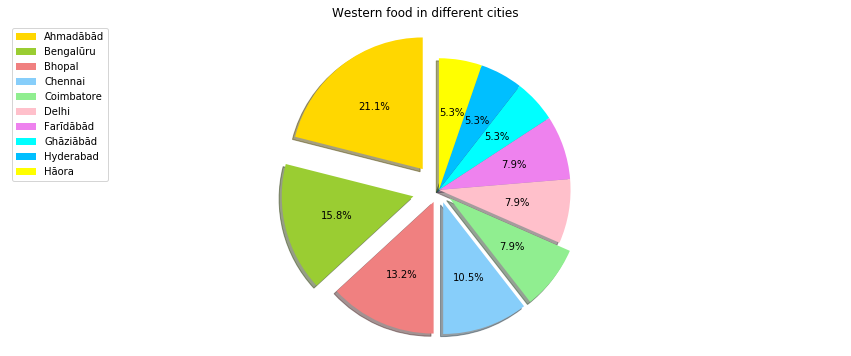

In [89]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','violet','cyan','deepskyblue','yellow']
explode_list = [0.2, 0.2, 0.1, 0.1, 0.1,0,0,0,0,0]
legend=total_new.index[0:10]
total_new['Western food'].head(10).plot(kind='pie',
                            figsize=(15, 6),
                            labels=None,
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° 
                            shadow=True,
                            colors=colors_list,
                            explode=explode_list)

plt.title('Western food in different cities')
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.legend(labels=legend,loc='upper left')
plt.ylabel('')

plt.show()